In [286]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [287]:
cloud_data_train = pd.read_csv('./train.csv')
cloud_data_test = pd.read_csv('./test.csv')

In [288]:
cloud_data_train.head()

,Nama File,Red,Green,Blue,Banyak Pixel Biru,Banyak Pixel Abu-Abu,Banyak Pixel Putih,Kondisi Cuaca,Waktu
0,Training_1.jpeg,76,94,103,71585,125472,2618,Mendung,Sun Apr 28 14:44:07 2024
1,Training_10.jpg,125,155,198,48482,6597,22062,Cerah,Sun Apr 28 14:44:07 2024
2,Training_100.jpg,123,187,238,16662,10,9130,Cerah,Sun Apr 28 14:44:07 2024
3,Training_1000.jpg,87,166,237,40035,4,30962,Cerah,Sun Apr 28 14:44:07 2024
4,Training_1001.jpg,99,172,240,44298,411,36904,Cerah,Sun Apr 28 14:44:08 2024


In [289]:
cloud_data_test.head()

,Nama File,Red,Green,Blue,Banyak Pixel Biru,Banyak Pixel Abu-Abu,Banyak Pixel Putih,Waktu
0,awan.jpeg,85,130,192,443946,27762,375413,Sun Apr 28 16:28:17 2024


In [290]:
cloud_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Nama File             100 non-null    object
 1   Red                   100 non-null    int64 
 2   Green                 100 non-null    int64 
 3   Blue                  100 non-null    int64 
 4   Banyak Pixel Biru     100 non-null    int64 
 5   Banyak Pixel Abu-Abu  100 non-null    int64 
 6   Banyak Pixel Putih    100 non-null    int64 
 7   Kondisi Cuaca         100 non-null    object
 8   Waktu                 100 non-null    object
dtypes: int64(6), object(3)
memory usage: 7.2+ KB


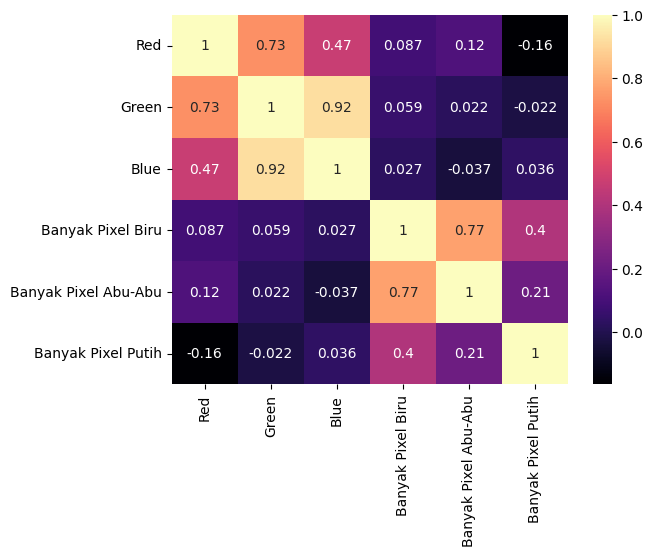

In [291]:
sns.heatmap(cloud_data_train.corr(numeric_only=True), cmap="magma", annot=True )
plt.show()

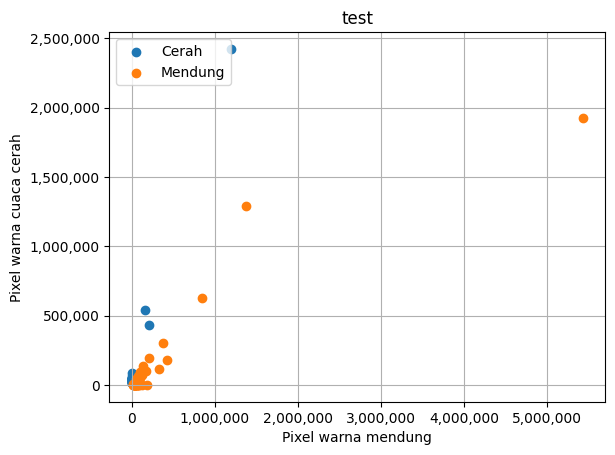

In [292]:
from matplotlib.ticker import FuncFormatter

figure, ax = plt.subplots()
n_data = 0
for weather, data in cloud_data_train.groupby('Kondisi Cuaca'):
  # lots_of_pixel
  lots_of_pixel = data[['Banyak Pixel Biru', 'Banyak Pixel Putih']].max(axis=1)

  
  ax.scatter(data['Banyak Pixel Abu-Abu'], lots_of_pixel, label=weather )

  n_data += 1

formatter = FuncFormatter(lambda x, _: '{:,}'.format(int(x)))
ax.xaxis.set_major_formatter(formatter)
ax.yaxis.set_major_formatter(formatter)


plt.legend(loc='upper left')
plt.title("test")
plt.xlabel("Pixel warna mendung")
plt.ylabel("Pixel warna cuaca cerah")
plt.grid(True)
plt.show()




In [293]:

def get_Nan_value(data):

  Nan_value = data.isna().sum()
  filter_nan = Nan_value[Nan_value > 0]

  return filter_nan

In [294]:
get_Nan_value(cloud_data_train)

Series([], dtype: int64)

In [295]:
def clean_data(data):
  data = data.drop(["Nama File", "Waktu"], axis=1)
  nan_columns = get_Nan_value(data)

 
  for Nan_column in  nan_columns.index.tolist():
    if data[Nan_column].dtype != 'int64' and data[Nan_column].dtype != 'float64':
      data[Nan_column] = data[Nan_column].fillna("U")


    else:
        data[Nan_column] = data[Nan_column].fillna(data[Nan_column].median())

        # data[Nan_column].fillna(data[Nan_column].median(), inplace=True)

  return data

In [296]:
data_train = clean_data(cloud_data_train)
data_test = clean_data(cloud_data_test)

# data_train.head(5)
data_test.head(5)

,Red,Green,Blue,Banyak Pixel Biru,Banyak Pixel Abu-Abu,Banyak Pixel Putih
0,85,130,192,443946,27762,375413


In [297]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()


cols = ["Kondisi Cuaca"]
for col_name in cols:
  data_train[col_name] = label_encoder.fit_transform(data_train[col_name])
  # data_test[col_name] = label_encoder.transform(data_test[col_name])
data_train.head(10)

,Red,Green,Blue,Banyak Pixel Biru,Banyak Pixel Abu-Abu,Banyak Pixel Putih,Kondisi Cuaca
0,76,94,103,71585,125472,2618,1
1,125,155,198,48482,6597,22062,0
2,123,187,238,16662,10,9130,0
3,87,166,237,40035,4,30962,0
4,99,172,240,44298,411,36904,0
5,63,63,63,0,63562,0,1
6,58,104,181,46259,3095,40504,0
7,90,101,102,1905,76935,0,1
8,92,100,106,446,24524,0,1
9,85,85,86,686,81085,0,1


In [298]:
from sklearn.model_selection import train_test_split

y = data_train["Kondisi Cuaca"]
x = data_train.drop("Kondisi Cuaca", axis=1)

x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size=0.1, random_state=42)

In [299]:
from sklearn.neighbors import KNeighborsClassifier

k = 2
model = KNeighborsClassifier(n_neighbors=k)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [300]:
prediction = model.predict(x_validation)
np.sum(prediction == y_validation) / len(y_validation)

0.9

In [301]:
result_predection = model.predict(data_test)

result_labels = np.where(result_predection == 1, 'Mendung', 'Cerah')


In [302]:
test_file_Name = cloud_data_test["Nama File"]

df = pd.DataFrame({"Nama File": test_file_Name.values,
                   "Kondisi Cuaca": result_labels })

In [303]:
df.to_csv("result.csv", index=False)